<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/bund_offensive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/JaperTai77/data-modified/main/bundesliga7team.csv')
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Manuel Neuer,Bayern Munich,GER,GK,34,33,33,2970,0,0,0,0,0.00,0.01,1,0
1,Thomas Müller,Bayern Munich,GER,MF,30,32,31,2674,11,19,1,1,0.24,0.39,0,0
2,David Alaba,Bayern Munich,AUT,"DF,MF",28,32,30,2675,2,4,0,0,0.04,0.08,4,0
3,Jérôme Boateng,Bayern Munich,GER,DF,31,29,29,2368,1,1,0,0,0.01,0.02,6,0
4,Robert Lewandowski,Bayern Munich,POL,FW,31,29,28,2458,41,7,8,9,1.16,0.13,4,0


In [ ]:
df.sort_values(by = 'Goals', ascending=False)[['Name','Club','Goals']].head(10)

,Name,Club,Goals
4,Robert Lewandowski,Bayern Munich,41
98,André Silva,Eintracht Frankfurt,28
30,Erling Haaland,Borussia Dortmund,27
80,Wout Weghorst,Wolfsburg,20
135,Lucas Alario,Bayer Leverkusen,11
158,Max Kruse,Union Berlin,11
1,Thomas Müller,Bayern Munich,11
9,Serge Gnabry,Bayern Munich,10
129,Patrik Schick,Bayer Leverkusen,9
126,Leon Bailey,Bayer Leverkusen,9


In [ ]:
df.sort_values(by = 'Mins', ascending=False)[['Name','Club','Mins']].head(10)

,Name,Club,Mins
150,Marvin Friedrich,Union Berlin,3060
151,Robin Knoche,Union Berlin,3042
0,Manuel Neuer,Bayern Munich,2970
55,Péter Gulácsi,RB Leipzig,2970
97,Kevin Trapp,Eintracht Frankfurt,2970
80,Wout Weghorst,Wolfsburg,2941
81,Koen Casteels,Wolfsburg,2880
29,Mats Hummels,Borussia Dortmund,2813
82,John Brooks,Wolfsburg,2774
152,Andreas Luthe,Union Berlin,2768


In [ ]:
df.sort_values(by = 'Assists', ascending=False)[['Name','Club','Assists']].head(10)

,Name,Club,Assists
1,Thomas Müller,Bayern Munich,19
99,Filip Kostić,Eintracht Frankfurt,14
101,Daichi Kamada,Eintracht Frankfurt,12
124,Moussa Diaby,Bayer Leverkusen,11
34,Jadon Sancho,Borussia Dortmund,11
33,Raphaël Guerreiro,Borussia Dortmund,10
5,Joshua Kimmich,Bayern Munich,10
6,Kingsley Coman,Bayern Munich,10
57,Dani Olmo,RB Leipzig,9
10,Leroy Sané,Bayern Munich,9


In [2]:
df['min/score'] = df.apply(lambda x: (x['Mins']/x['Goals']) if x['Goals'] != 0 else 0 ,axis=1)
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,min/score
0,Manuel Neuer,Bayern Munich,GER,GK,34,33,33,2970,0,0,0,0,0.00,0.01,1,0,0.000000
1,Thomas Müller,Bayern Munich,GER,MF,30,32,31,2674,11,19,1,1,0.24,0.39,0,0,243.090909
2,David Alaba,Bayern Munich,AUT,"DF,MF",28,32,30,2675,2,4,0,0,0.04,0.08,4,0,1337.500000
3,Jérôme Boateng,Bayern Munich,GER,DF,31,29,29,2368,1,1,0,0,0.01,0.02,6,0,2368.000000
4,Robert Lewandowski,Bayern Munich,POL,FW,31,29,28,2458,41,7,8,9,1.16,0.13,4,0,59.951220


In [3]:
df['min/score'] = df['min/score'].apply(lambda x: round(x,2))
df[df['min/score'] != 0].sort_values(by = 'min/score', ascending=True)[['Name','Club','min/score']].head(10)

,Name,Club,min/score
4,Robert Lewandowski,Bayern Munich,59.95
53,Ansgar Knauff,Borussia Dortmund,71.00
30,Erling Haaland,Borussia Dortmund,89.15
98,André Silva,Eintracht Frankfurt,98.57
121,Ragnar Ache,Eintracht Frankfurt,100.00
135,Lucas Alario,Bayer Leverkusen,113.18
51,Youssoufa Moukoko,Borussia Dortmund,140.67
164,Joel Pohjanpalo,Union Berlin,141.83
15,Jamal Musiala,Bayern Munich,146.83
80,Wout Weghorst,Wolfsburg,147.05


In [ ]:
nation_club_goal = df.pivot_table(index = 'Nationality',columns = 'Club', values='Goals', aggfunc='sum').fillna(0)

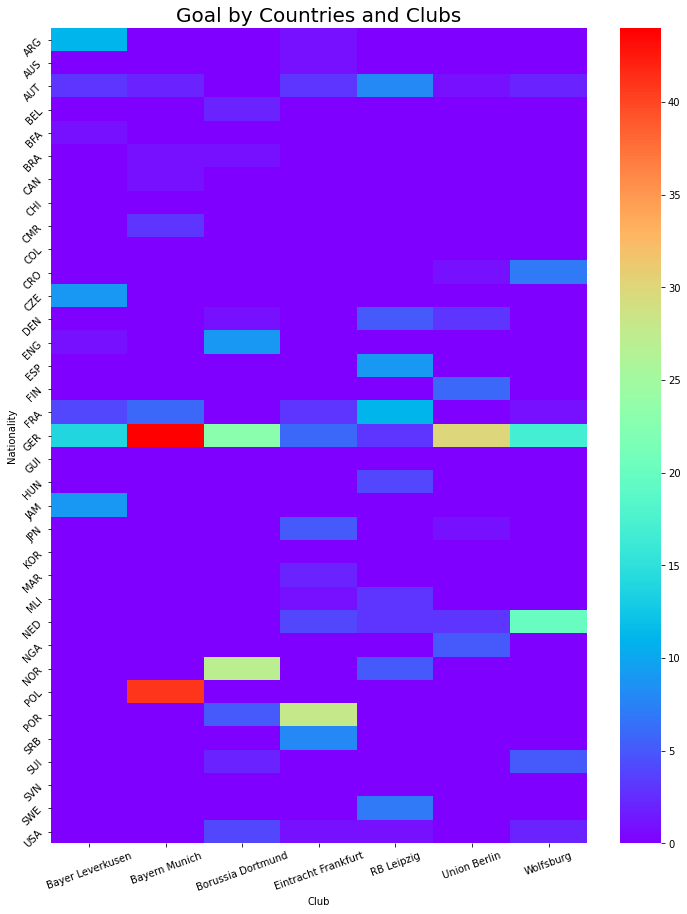

In [ ]:
plt.figure(figsize = (12,15))
sns.heatmap(nation_club_goal, cmap = 'rainbow')
plt.title('Goal by Countries and Clubs', fontsize = 20)
plt.xticks(rotation = 20)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
goal_position = df.groupby('Position').agg({'Age':'mean','Goals':'sum','Assists':'sum','Position':'count'})
goal_position.columns = ['avg_age','goals','assists','count']
goal_position.sort_values(by = 'avg_age')

,avg_age,goals,assists,count
Position,,,,
"DF,FW",20.750000,4,4,4
"FW,DF",22.000000,7,7,2
"FW,MF",23.653846,106,92,26
FW,23.727273,173,52,22
"MF,FW",24.083333,29,43,12
MF,25.137931,65,75,29
DF,25.482143,58,65,56
"DF,MF",25.888889,4,15,9
"MF,DF",27.333333,4,2,3


In [ ]:
def box_dist(x):
  quantile3 = df[x].quantile(0.75)
  quantile1 = df[x].quantile(0.25)
  q =  1.5*(quantile3-quantile1)

  plt.style.use('ggplot')
  fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,7))
  sns.boxplot(y = df[x],ax = ax1, color = 'coral')
  ax1.text(0, quantile3+q, 'Upper bound: %s' %str(round(quantile3+q,2)), size=11, rotation=0,ha="center", va="bottom", color = 'blue')
  ax1.set_title('Boxplot')
  
  mean_val = df[x].values.mean()
  sns.distplot(df[x], ax = ax2, color = 'blue')
  ax2.axvline(mean_val, color='red', linestyle='dashed', linewidth=1)
  ax2.text(mean_val, 0.01, 'Mean value is '+str(mean_val), ha = 'right', rotation = 'vertical', color = 'red')
  ax2.set_title('Distribution')
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


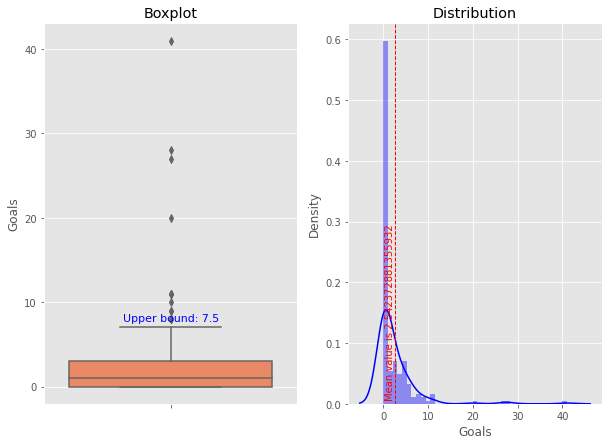

In [ ]:
box_dist('Goals')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


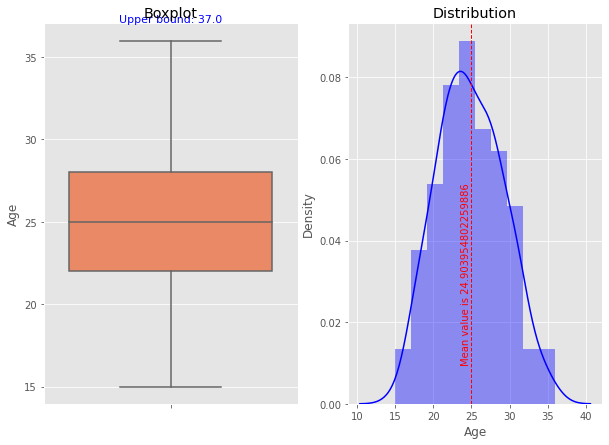

In [ ]:
box_dist('Age')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


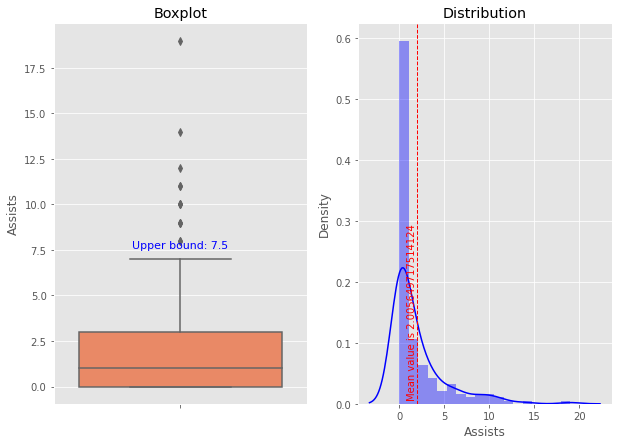

In [ ]:
box_dist('Assists')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x720 with 0 Axes>

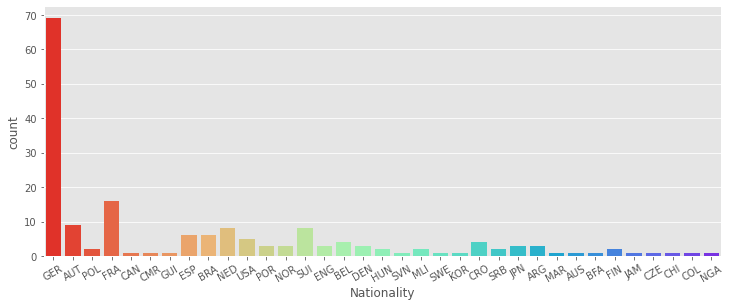

In [ ]:
plt.figure(figsize = (10,10))
sns.catplot('Nationality', data = df, kind = 'count',palette = 'rainbow_r',height=4,aspect=2.5)
plt.xticks(rotation = 30)
plt.show()

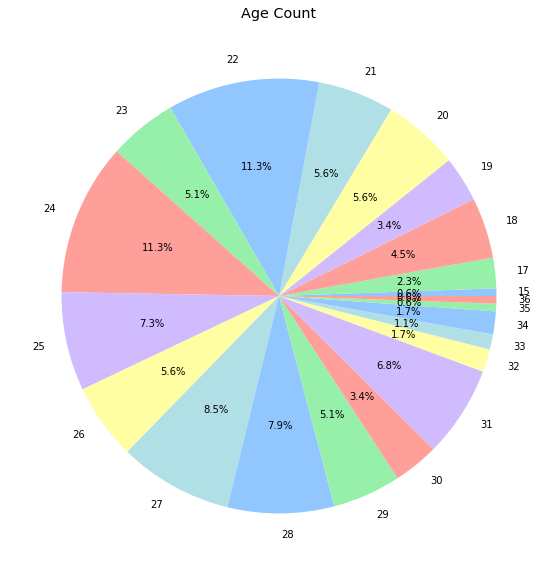

In [ ]:
temp = df.groupby(['Age']).agg({'Age':'count'})
temp.columns = ['count']

plt.style.use('seaborn-pastel')
plt.figure(figsize = (10,10))
plt.pie(temp['count'],labels=temp.index,autopct='%1.1f%%')
plt.title('Age Count')
plt.show()

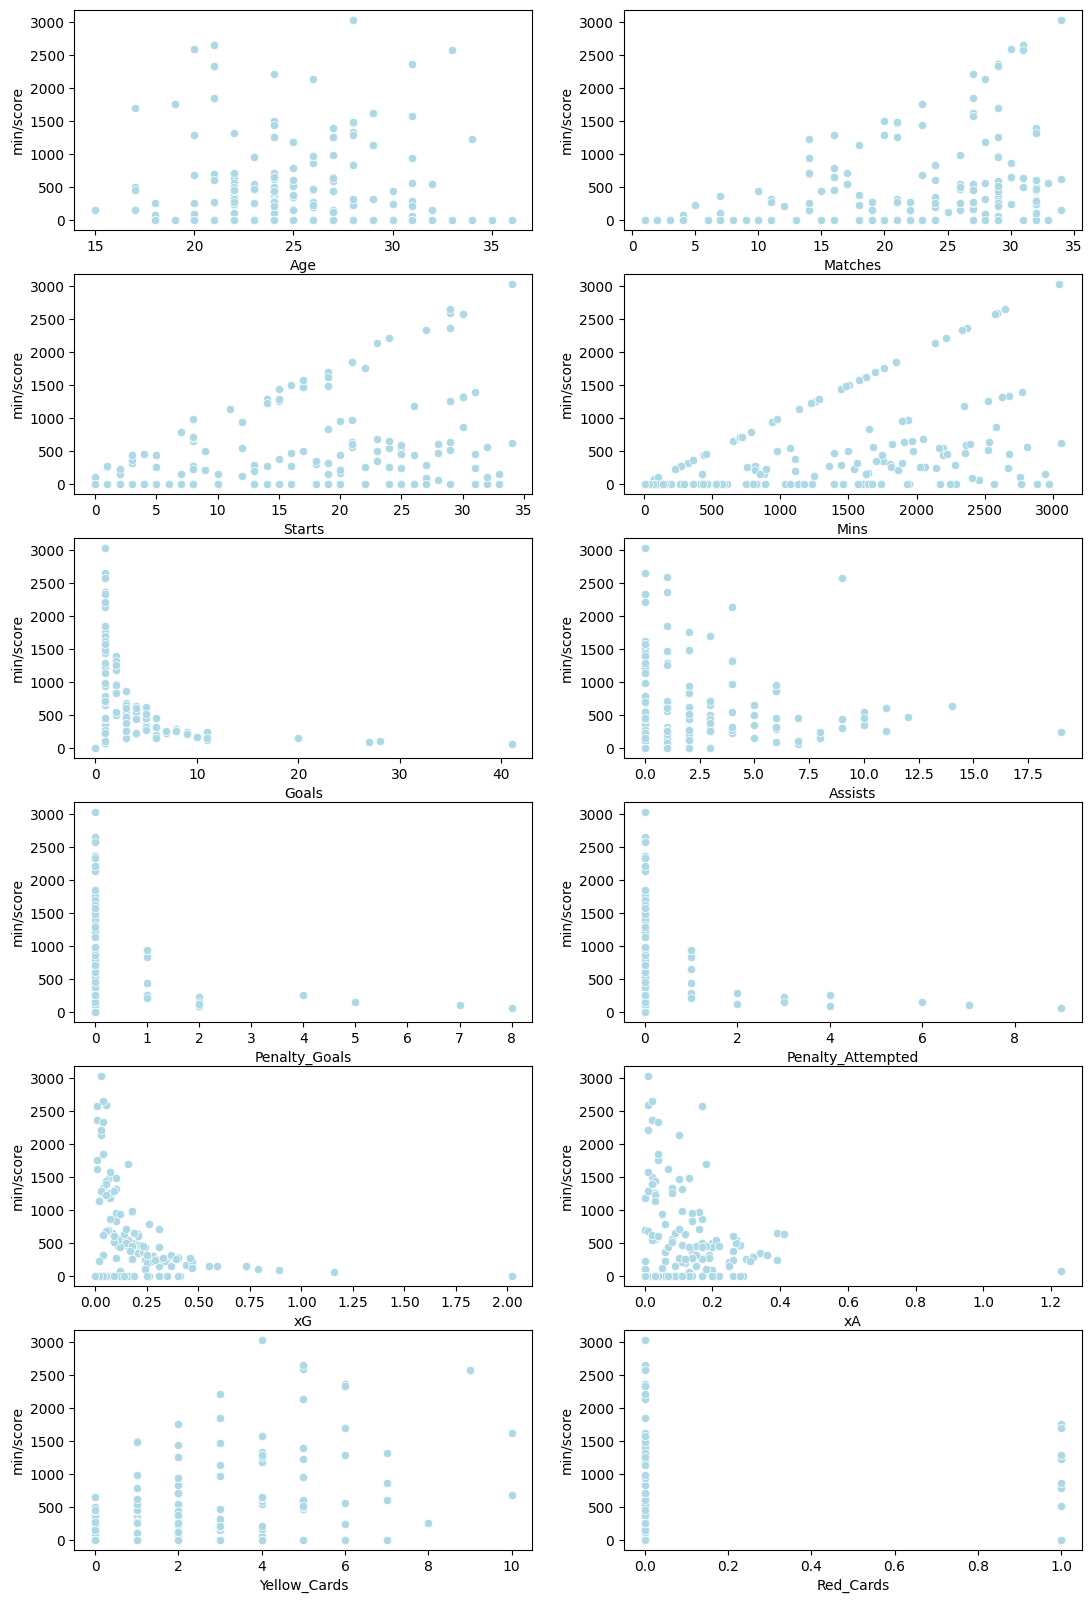

In [ ]:
int_col = df.select_dtypes(['int','float']).columns.drop('min/score')
plt.style.use('default')
plt.figure(figsize = (13,20))
for i,c in enumerate(int_col):
  plt.subplot(6,2,i+1)
  sns.scatterplot(x = c, y = 'min/score', data = df, color = 'lightblue')
plt.show()

Text(0.5, 1.0, 'Goal vs Min Played')

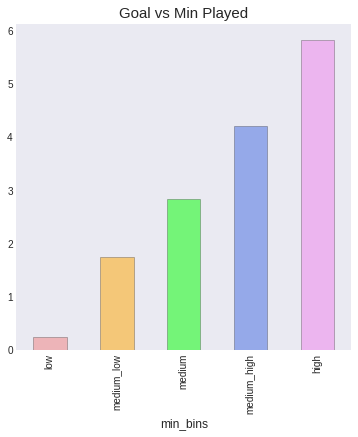

In [ ]:
plt.style.use('seaborn-dark')
df['min_bins'] = pd.cut(df.Mins, bins = 5, labels = ['low','medium_low','medium','medium_high','high'])
df.groupby('min_bins').mean()['Goals'].T.plot(kind = 'bar',figsize = (6,6), color = ['lightcoral','orange','lime','royalblue','violet'],alpha = 0.5,edgecolor='black')
plt.title('Goal vs Min Played', fontsize = 15)

In [ ]:
df['min/assist'] = df.apply(lambda x: (x['Mins']/x['Assists']) if x['Assists'] != 0 else 0 ,axis=1)
df['min/assist'] = df['min/assist'].apply(lambda x: round(x,2))

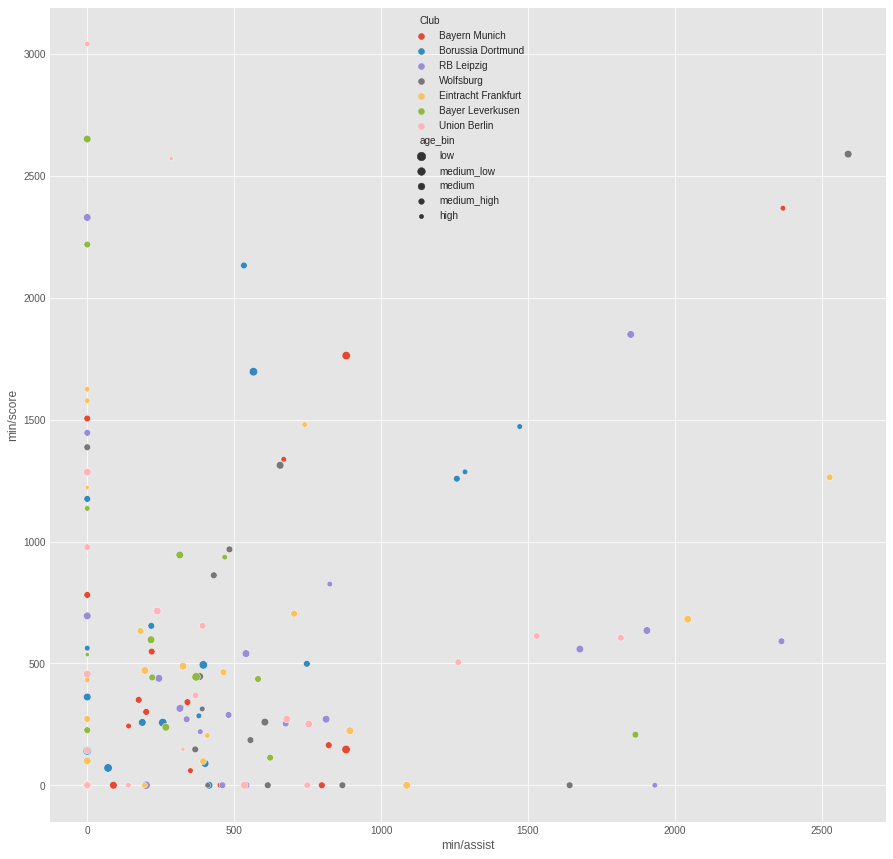

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (15,15))
df['age_bin'] = pd.cut(df.Age, bins = 5, labels = ['low','medium_low','medium','medium_high','high'])
sns.scatterplot(x = 'min/assist', y = 'min/score', data = df, hue = 'Club', size = 'age_bin')
plt.show()

In [ ]:
goal_position = goal_position.reset_index()
goal_position = goal_position.sort_values(by = 'avg_age',ascending= False)

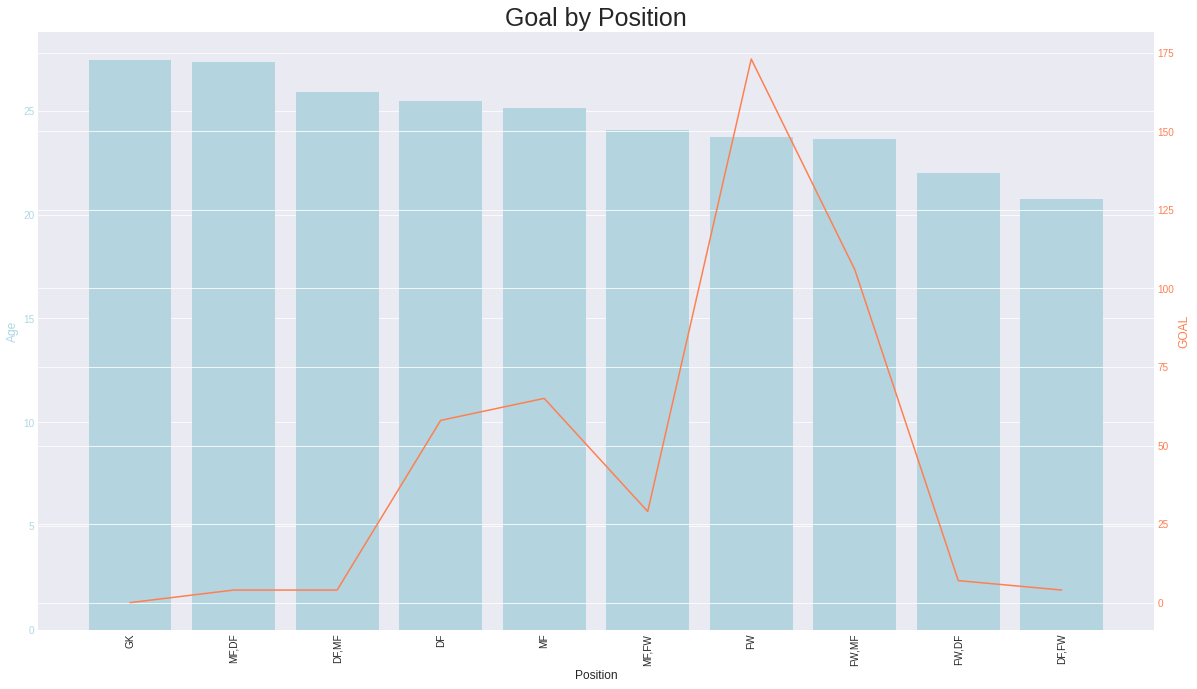

In [ ]:
plt.style.use('seaborn-darkgrid')
fig, ax1 = plt.subplots(figsize = (20,11))
ax2 = ax1.twinx()

sns.barplot(x = goal_position.Position, y = goal_position.avg_age, color = 'lightblue', ax = ax1)
ax1.set_ylabel('Age', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.tick_params(axis='x', rotation = 90)
sns.lineplot(x = goal_position.Position, y = goal_position.goals,color = 'coral', ax = ax2)
ax2.tick_params(axis='y', labelcolor='coral',)
ax2.set_ylabel('GOAL', color='coral')
plt.title('Goal by Position', fontdict = {'fontsize':25})
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='Goals', y='Assists', z='Yellow_Cards',
                    color='Age')
fig.show()

In [13]:
import plotly.express as px
fig = px.bar(df, x="Club", y="Goals", color="Club",
  animation_frame="Position", animation_group="Club",range_y=[0,35])
fig.show()